# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Dataset

In [29]:
df=pd.read_csv("1000_Companies.csv")

# View the Dataset

In [3]:
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


Checking if there are any Missing Data

In [9]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [13]:
df.groupby("State").size()

State
California    344
Florida       322
New York      334
dtype: int64

# Visualization Of the Data

Check to see how the dataset correlate with each other

<AxesSubplot:>

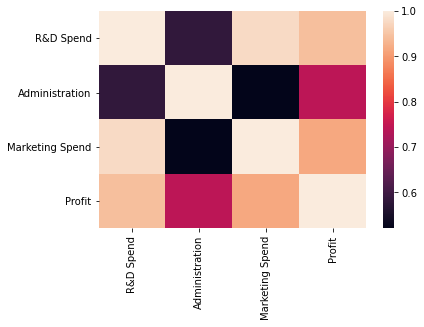

In [14]:
sns.heatmap(df.corr())

# Define X and Y

In [15]:
X=df.drop(["State", "Profit"], axis=1)
Y=df["Profit"]

In [16]:
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [17]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

# Split the Data into Test and Train

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Model of the Data

In [20]:
from sklearn.linear_model import LinearRegression
LR= LinearRegression()

In [21]:
LR.fit(X_train,Y_train)

LinearRegression()

# Predictions

In [22]:
pred_Y = LR.predict(X_test)

In [23]:
pred_Y

array([ 88956.51235675,  87590.33288232,  94070.44261188, 175895.04692542,
        83264.8145068 , 110477.49237073, 131430.2598783 ,  90642.52735311,
       164607.08606112,  53200.26939431,  66071.93223218, 150732.06810844,
       126152.87519631,  58444.88520795, 176849.39498851,  75153.71533755,
       118351.29429923, 163884.87669731, 175400.90815642, 182112.92585765,
       124261.66808511,  84827.88205071, 181217.0423071 ,  83300.06523457,
       104201.14892595, 100421.58636367,  56176.51178313,  56683.21021556,
        68021.89761145, 211034.28879633, 120886.76507098, 110933.17209544,
       101375.93452471, 138100.28197215,  63085.94027719, 108060.67022905,
       186066.16240107, 171648.62759104, 174856.44098586, 117773.52671411,
        96610.21232336, 164764.42456104, 106924.90997596,  50166.13018234,
       116613.69288829,  57738.15173913, 158597.27225544,  78567.87418509,
       159911.00551765, 131265.94577114, 185112.67412592, 174821.19035605,
        92919.20647932,  

In [24]:
LR.predict([[165349.20, 136897.80, 471784.10]])

array([201008.97589549])

# Accuracy of The Model

In [25]:
from sklearn.metrics import r2_score
r2_score(Y_test, pred_Y)*100

93.12800781130099